# Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

В прошлых юнитах мы познакомились с корреляцией и её типами. В этом юните мы узнаем о наглядных способах представления корреляций пары признаков и корреляций признаков всего датасета.

В качестве датасета для визуализации корреляций возьмём новые данные о параметрах фигур девушек месяца журнала «Плейбой».

Набор данных содержит ~600 записей о девушках и восемь признаков:

* ``BMI`` — индекс массы тела (ИМТ)
* ``year`` — год размещения модели в журнале
* ``month`` — месяц размещения
* ``waist`` — обхват талии модели
* ``hips`` — обхват бёдер модели
* ``height`` — рост модели
* ``weight`` — вес модели
* ``waist/hip`` — соотношение обхвата талии и бёдер

Прочитаем датасет и приступим к изучению способов визуализации.

In [23]:
import pandas as pd

In [24]:
model_data = pd.read_csv('data/model.csv')
model_data

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
...,...,...,...,...,...,...,...,...
657,September,2008,25.000000,36.000000,67.000000,115.000000,18.010000,0.690000
658,October,2008,24.000000,34.000000,65.000000,115.000000,19.130000,0.710000
659,November,2008,21.000000,32.000000,66.000000,108.000000,17.430000,0.660000
660,December,2008,25.000000,35.000000,68.000000,115.000000,17.480000,0.710000


## МАТРИЦА КОРРЕЛЯЦИЙ

В случае большого количества данных в датасете матрица, возвращаемая методом pandas data.corr(), становится нечитаемой.

### Задание 6.1

Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.

In [25]:
model_data_corr = model_data[['Year', 'Waist', 'Hips', 'Height', 'Weight', 'BMI', 'Waist/Hip']].corr()
model_data_corr

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


Матрица получилась большой и потребовалось достаточно много времени, чтобы проанализировать все коэффициенты в этой матрице. А если признаков будет больше? Найти что-то в ней будет практически невозможно.

Поэтому специалисты по данным отдают предпочтение методам визуализации. Один из таких — тепловая матрица корреляций.



## ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ

Для построения такой матрицы нам будет необходима знакомая нам из модуля по визуализации библиотека seaborn.

Импортируем библиотеку для дальнейшего использования:

In [26]:
import seaborn as sns

Для построения тепловой матрицы корреляций мы воспользуемся методом sns.heatmap() библиотеки seaborn. 

Метод принимает на вход двумерный массив данных под аргументом data. Это может быть матрица корреляций, полученная методом df.corr(), матрица пропущенных значений, полученная методом df.isnull(), набор данных и многое другое. 

Передадим в метод heatmap() нашу матрицу корреляций corr():

<Axes: >

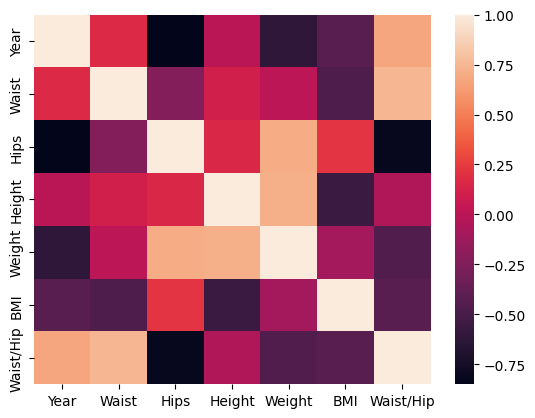

In [27]:
sns.heatmap(model_data_corr.corr())

Чтобы было удобнее её интерпретировать, передадим параметр annot = True, чтобы отобразить коэффициент корреляции на пересечении признаков.

<Axes: >

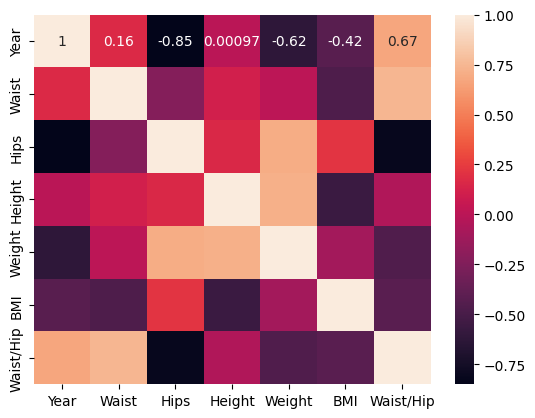

In [28]:
sns.heatmap(model_data_corr.corr(), annot = True)